In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone

In [4]:
mnist_data = pd.read_csv('datasets/mnist.csv')

mnist_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mnist_data.shape

(10000, 785)

In [9]:
mnist_data['label'].nunique()

10

In [11]:
mnist_features = mnist_data[mnist_data.columns[1:]]

mnist_label = mnist_data['label']

In [16]:
def display_image(index):
    print('Digit: ', mnist_label[index])
    
    plt.imshow(mnist_features.loc[index].values.reshape(28, 28), cmap='Greys')

Digit:  1


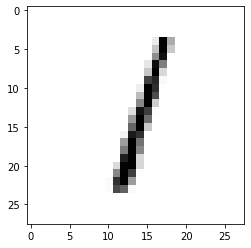

In [17]:
display_image(2)

Digit:  7


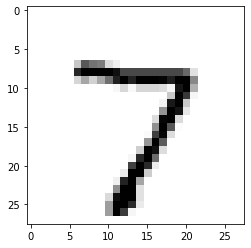

In [18]:
display_image(0)

In [19]:
mnist_features = np.asarray(mnist_features)

mnist_features.shape

(10000, 784)

In [20]:
mnist_features[10][150:200]

array([179, 245, 236, 242, 254, 254, 254, 254, 245, 235,  84,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 151, 254, 254, 254, 213, 192, 178, 178, 180, 254, 254, 241,
        46,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int64)

In [21]:
mnist_features = mnist_features /255

In [22]:
mnist_features[10][150:200]

array([0.70196078, 0.96078431, 0.9254902 , 0.94901961, 0.99607843,
       0.99607843, 0.99607843, 0.99607843, 0.96078431, 0.92156863,
       0.32941176, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.59215686, 0.99607843, 0.99607843,
       0.99607843, 0.83529412, 0.75294118, 0.69803922, 0.69803922,
       0.70588235, 0.99607843, 0.99607843, 0.94509804, 0.18039216,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [24]:
x_train, x_test, y_train, y_test = train_test_split(mnist_features, mnist_label, test_size = 0.2, shuffle = True)

In [26]:
logistic = linear_model.LogisticRegression(solver ='lbfgs', max_iter = 1000, multi_class = 'multinomial')

In [28]:
param_grid = {'C' : [0.1, 1, 5]}

grid_search = GridSearchCV(logistic, param_grid, cv = 2)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'C': 0.1}

In [32]:
for i in range(3):
    print('parameters: ', grid_search.cv_results_['params'][i])
    print('mean test score: ', grid_search.cv_results_['mean_test_score'][i])
    print('rank: ', grid_search.cv_results_['rank_test_score'][i])
    print()

parameters:  {'C': 0.1}
mean test score:  0.909125
rank:  1

parameters:  {'C': 1}
mean test score:  0.904
rank:  2

parameters:  {'C': 5}
mean test score:  0.8967499999999999
rank:  3



In [34]:
rbm = BernoulliRBM(verbose = True)

rbm_features_classifier = Pipeline(steps = [('rbm', rbm),
                                            ('logistic', logistic)
                                          ])

rbm.learning_rate = 0.04
logistic.C = grid_search.best_params_['C']

In [36]:
rbm_features_classifier.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'rbm', 'logistic', 'rbm__batch_size', 'rbm__learning_rate', 'rbm__n_components', 'rbm__n_iter', 'rbm__random_state', 'rbm__verbose', 'logistic__C', 'logistic__class_weight', 'logistic__dual', 'logistic__fit_intercept', 'logistic__intercept_scaling', 'logistic__l1_ratio', 'logistic__max_iter', 'logistic__multi_class', 'logistic__n_jobs', 'logistic__penalty', 'logistic__random_state', 'logistic__solver', 'logistic__tol', 'logistic__verbose', 'logistic__warm_start'])

In [40]:
param_grid = [{'rbm__n_components' : [5, 50, 100,150],
               'rbm__n_iter': [5, 20]}]

grid_search = GridSearchCV(rbm_features_classifier, param_grid, cv = 2)

grid_search.fit(x_train, y_train)

grid_search.best_params_

[BernoulliRBM] Iteration 1, pseudo-likelihood = -200.10, time = 0.36s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -195.54, time = 0.36s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -198.44, time = 0.36s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -193.40, time = 0.27s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -190.67, time = 0.22s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -199.92, time = 0.24s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -198.74, time = 0.20s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -194.66, time = 0.25s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -199.40, time = 0.26s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -203.69, time = 0.23s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -199.36, time = 0.20s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -199.41, time = 0.28s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -195.14, time = 0.33s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -190.55, time = 0.32s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 8, pseudo-likelihood = -97.99, time = 1.26s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -96.11, time = 1.05s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -93.08, time = 1.24s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -95.11, time = 1.16s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -87.67, time = 1.34s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -98.47, time = 1.57s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -89.54, time = 1.47s
[BernoulliRBM] Iteration 15, pseudo-likelihood = -97.68, time = 1.32s
[BernoulliRBM] Iteration 16, pseudo-likelihood = -87.22, time = 1.18s
[BernoulliRBM] Iteration 17, pseudo-likelihood = -96.23, time = 1.09s
[BernoulliRBM] Iteration 18, pseudo-likelihood = -90.28, time = 0.93s
[BernoulliRBM] Iteration 19, pseudo-likelihood = -91.44, time = 1.08s
[BernoulliRBM] Iteration 20, pseudo-likelihood = -90.46, time = 1.59s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -143.96, time = 0.95s
[BernoulliRBM] Iterati

{'rbm__n_components': 150, 'rbm__n_iter': 20}

In [42]:
for i in range(8):
    print('parameters: ', grid_search.cv_results_['params'][i])
    print('mean test score: ', grid_search.cv_results_['mean_test_score'][i])
    print('rank: ', grid_search.cv_results_['rank_test_score'][i])
    print()

parameters:  {'rbm__n_components': 5, 'rbm__n_iter': 5}
mean test score:  0.11325
rank:  7

parameters:  {'rbm__n_components': 5, 'rbm__n_iter': 20}
mean test score:  0.11325
rank:  7

parameters:  {'rbm__n_components': 50, 'rbm__n_iter': 5}
mean test score:  0.843125
rank:  6

parameters:  {'rbm__n_components': 50, 'rbm__n_iter': 20}
mean test score:  0.8745
rank:  5

parameters:  {'rbm__n_components': 100, 'rbm__n_iter': 5}
mean test score:  0.899125
rank:  4

parameters:  {'rbm__n_components': 100, 'rbm__n_iter': 20}
mean test score:  0.912625
rank:  3

parameters:  {'rbm__n_components': 150, 'rbm__n_iter': 5}
mean test score:  0.919
rank:  2

parameters:  {'rbm__n_components': 150, 'rbm__n_iter': 20}
mean test score:  0.922875
rank:  1

